In [1]:
using PyPlot, Interact

## Projection onto a line

Suppose $b$ is a vector of data and we want to find $p$, a multiple of $a=(1,1,\ldots,1)$, say, closest to $b$.
Which vector is that?

Let us call this vector $p=\hat{x}a$.

Here is an example in 2d:

In [2]:
b = rand(2)

2-element Array{Float64,1}:
 0.405977
 0.752382

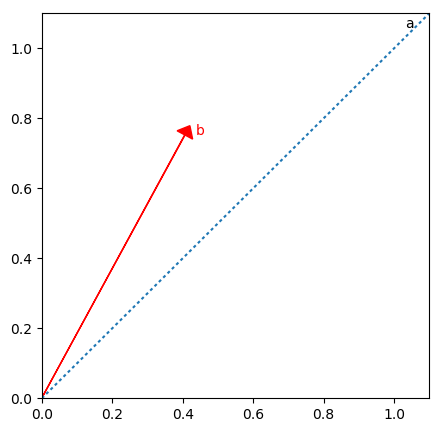

In [3]:
figure(figsize=(5,5))
arrow(0,0,b[1],b[2],head_width=0.05, head_length=0.03,color="r")
plot([0,1.1],[0,1.1],":")
text(b[1]+.03,b[2],"b",color="r")
text(1.03,1.06,"a")
axis([0,1.1,0,1.1]);

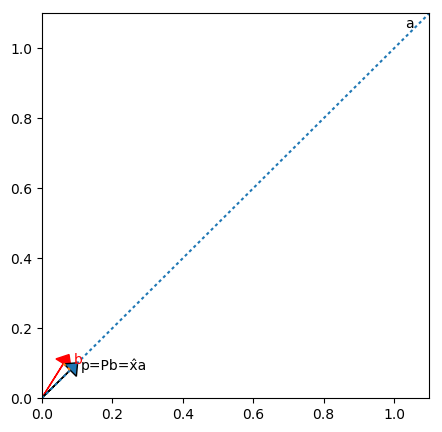

PyObject <matplotlib.text.Text object at 0x329310c50>

In [4]:
b = rand(2)      # random red vector


figure(figsize=(5,5))
arrow(0,0,b[1],b[2],head_width=0.05, head_length=0.03,color="r")
text(b[1]+.03,b[2],"b",color="r")
plot([0,1.1],[0,1.1],":")
axis([0,1.1,0,1.1]);

a = ones(2)    # target direction
x̂ = (a'b)/(a'a)
p = a * x̂      # projection
plot([b[1],p[1]],[b[2],p[2]],":")
arrow(0,0,p[1],p[2],head_width=0.05, head_length=0.03)
text(p[1]+.03,p[2],"p=Pb=x̂a")
text(1.03,1.06,"a")

Let us break this into steps

1. Find $\hat{x}$ 
2. Find $p$
3. Find matrix $P$ such that $Pb=p$

To do this form the "error" vector  $e = b - p = b - \hat{x}a$ where $\hat{x}$ is the unknown.  We choose $\hat{x}$ specifically to make $e \perp a$.

We want $a \cdot (b-\hat{x}a) = 0$ (where $\cdot$ denotes the dot product) so that 

1. $\hat{x} = (a \cdot b)/(a \cdot a) = (a^Tb)/(a^Ta) $  we then have
2. $p = \hat{x}a = a\hat{x} = a (a^Tb)/(a^Ta)$
3. $Pb = a (a^Tb)/(a^Ta)$ gives $P = (aa^T)/(a^Ta)$

Example:

In [5]:
P = (a*a')/(a'a)

2×2 Array{Float64,2}:
 0.5  0.5
 0.5  0.5

In [6]:
@manipulate for n=slider(1:15,value=2)
    a = ones(Rational,n)
    P = (a*a')/(a'a)
end

Interact.Slider{Int64}(Signal{Int64}(2, nactions=1),"",2,1:15,"horizontal",true,"d",true)

2×2 Array{Rational{Int64},2}:
 1//2  1//2
 1//2  1//2

In the special case of a being the ones vector, $\hat{x}$ is the mean of $b$.  If only one number is used to
summarize a large data vector $b$, it is commonly the mean.

Now consider more general $a$.

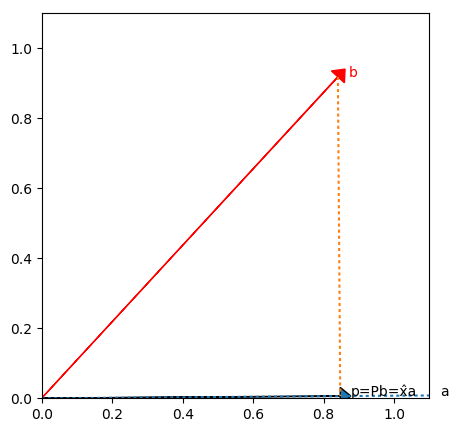

PyObject <matplotlib.text.Text object at 0x3296e27d0>

In [7]:
b = rand(2)                       # random red vector
a = rand(2); a *= 1.1/maximum(a)  # target direction
P = (a*a')/a'a
p = P*b

figure(figsize=(5,5))
arrow(0,0,b[1],b[2],head_width=0.05, head_length=0.03,color="r")
text(b[1]+.03,b[2],"b",color="r")
plot([0,a[1]],[0,a[2]],":")
axis([0,1.1,0,1.1]);

plot([b[1],p[1]],[b[2],p[2]],":")
arrow(0,0,p[1],p[2],head_width=0.05, head_length=0.03)
text(p[1]+.03,p[2],"p=Pb=x̂a")
text(a[1]+.03,a[2],"a")

In [8]:
# Powers of P remain equal.  Explain why geometrically?
# Answer: once you project, projecting again keeps you where you were
display(P)
display(P^2)
display(P^3)

2×2 Array{Float64,2}:
 0.999947    0.00729359
 0.00729359  5.31993e-5

2×2 Array{Float64,2}:
 0.999947    0.00729359
 0.00729359  5.31993e-5

2×2 Array{Float64,2}:
 0.999947    0.00729359
 0.00729359  5.31993e-5

Relationship to least squares:

In [9]:
 x̂= (a'b)/(a'a)

1×1 Array{Float64,2}:
 0.770082

In [10]:
a\b

1-element Array{Float64,1}:
 0.770082

## Projection on a subspace

In [11]:
A = rand(5, 3) # consider the subspace spanned by the columns of A

5×3 Array{Float64,2}:
 0.857652  0.517855   0.280477
 0.418829  0.556069   0.964192
 0.376845  0.64954    0.692936
 0.839149  0.0958249  0.297049
 0.533046  0.988303   0.900709

In [12]:
b = rand(5)

5-element Array{Float64,1}:
 0.65487 
 0.536363
 0.847276
 0.527487
 0.667052

Our problem
1. Find the vector $p$ that is in the column space of $A$ that is closest to $b$
2.  Project $b$ onto the column space of $A$


Find the linear combination of the columns of ($m \times n$) $A$ closest to $b$

In other words, find an $\hat{x}$ in $\Re^n$ such that $A\hat{x}$ is closest to $b$.

How do we find $\hat{x}$?  Idea is the same as the line. Make $e=b-A\hat{x} \perp $ to every column of $A$:

$A^T(b-A\hat{x})=0$ is equivalent to the first column of $A$ is orthogonal to $e$, and the second column is orthogonal to $e$, ..., and the last column of $A$ is orthogonal to $A$.

$A^TA\hat{x} = A^Tb$. (known as the **normal equations**)

1. $\hat{x} = (A^TA)^{-1}A^Tb$
2. $p = A\hat{x} = A(A^TA)^{-1}A^Tb$
3. $P =A(A^TA)^{-1}A^T $ (is the projection matrix)


Some examples

In [13]:
A

5×3 Array{Float64,2}:
 0.857652  0.517855   0.280477
 0.418829  0.556069   0.964192
 0.376845  0.64954    0.692936
 0.839149  0.0958249  0.297049
 0.533046  0.988303   0.900709

In [14]:
P = A * inv(A'A) * A'

5×5 Array{Float64,2}:
  0.680624   -0.275029   0.0718287   0.273674    0.24835 
 -0.275029    0.726659   0.227343    0.235613    0.125645
  0.0718287   0.227343   0.233565   -0.0612794   0.344112
  0.273674    0.235613  -0.0612794   0.765488   -0.212956
  0.24835     0.125645   0.344112   -0.212956    0.593663

In [15]:
P^10

5×5 Array{Float64,2}:
  0.680624   -0.275029   0.0718287   0.273674    0.24835 
 -0.275029    0.726659   0.227343    0.235613    0.125645
  0.0718287   0.227343   0.233565   -0.0612794   0.344112
  0.273674    0.235613  -0.0612794   0.765488   -0.212956
  0.24835     0.125645   0.344112   -0.212956    0.593663

In [16]:
b = rand(5)

5-element Array{Float64,1}:
 0.458361
 0.601126
 0.721415
 0.940134
 0.816022

In [17]:
p = P*b

5-element Array{Float64,1}:
 0.658412
 0.798797
 0.561274
 0.768752
 0.721845

In [18]:
e = p - b

5-element Array{Float64,1}:
  0.200051
  0.197671
 -0.16014 
 -0.171382
 -0.094177

In [19]:
A'e

3-element Array{Float64,1}:
 -1.49186e-15
 -1.22125e-15
 -1.67921e-15

In [20]:
x̂ =  inv(A'A)*A'b

3-element Array{Float64,1}:
  0.707741
 -0.265997
  0.674437

In [21]:
A\b # in matlab and in julia, to solve the least squares system
# Ax=b for the best vector x̂, type A\b

3-element Array{Float64,1}:
  0.707741
 -0.265997
  0.674437

## Math: $(A^TA)$ is invertible when $A$ has linearly independent columns

Suppose that $A^TA$ is not invertible.  Then there is a nonzero x $x$ such that $A^TAx=0$.  Then
$x^TA^TAx=0=\|Ax\|^2$.  Then $Ax=0$ meaning $A$ does not have linearly independent columns.
Taking the contrapositive, if $A$ has linearly independent columns $A^TA$ is invertible.

Note logically one should prove the converse too.  This is implied in the "when." 
If $A$ does not have  linearly independent columns, there is a nonzero $x$ with $Ax=0$.
Multiplying by $A^T$ we have $A^TAx$ is then $0$
so $A^TA$ is not invertible.


## Briefly mentioned:

* Chebychev Approximation = polynomial fitting = linear equations

* Machine learning = nonlinear fitting = nonlinear equations

* In high school stats classes , students are told to divide by $n-1$, not $n$, for sample variance.

  - Some argument about degrees of freedom usually appeases the masses. In fact, the projection matrix `P = I - ones(n,n)/n` can be viewed as "removing the mean" or projection orthogonal to the "ones" vector. Removing the true mean creates a vector whose element squares have expectation $\sigma^2$ and cross terms have expectation 0.

  - You might check that the sample variance numerator is $\|Pb\|^2$. This is the same as $b^TPb$, which is readliy checked to have average
$\sigma^2$ times the sum of the diagonal elements of $P$, which is  $n \times \left( 1-\frac{1}{n}\right)=n-1$.
    